<h2>Dataset Link</h2>

https://www.kaggle.com/datasets/nimapourmoradi/raisin-binary-classification/data

<h2>Data Preprocessing</h2>

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import tensorflow as tf
from keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Dataset/Raisin_Dataset.csv')
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [4]:
df.duplicated().sum()

0

In [5]:
df.describe()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,87804.127778,430.929950,254.488133,0.781542,91186.090000,0.699508,1165.906636
std,39002.111390,116.035121,49.988902,0.090318,40769.290132,0.053468,273.764315
min,25387.000000,225.629541,143.710872,0.348730,26139.000000,0.379856,619.074000
25%,59348.000000,345.442898,219.111126,0.741766,61513.250000,0.670869,966.410750
50%,78902.000000,407.803951,247.848409,0.798846,81651.000000,0.707367,1119.509000
75%,105028.250000,494.187014,279.888575,0.842571,108375.750000,0.734991,1308.389750
max,235047.000000,997.291941,492.275279,0.962124,278217.000000,0.835455,2697.753000


In [6]:
df['Class'].value_counts()

Class
Kecimen    450
Besni      450
Name: count, dtype: int64

<h2>EDA</h2>

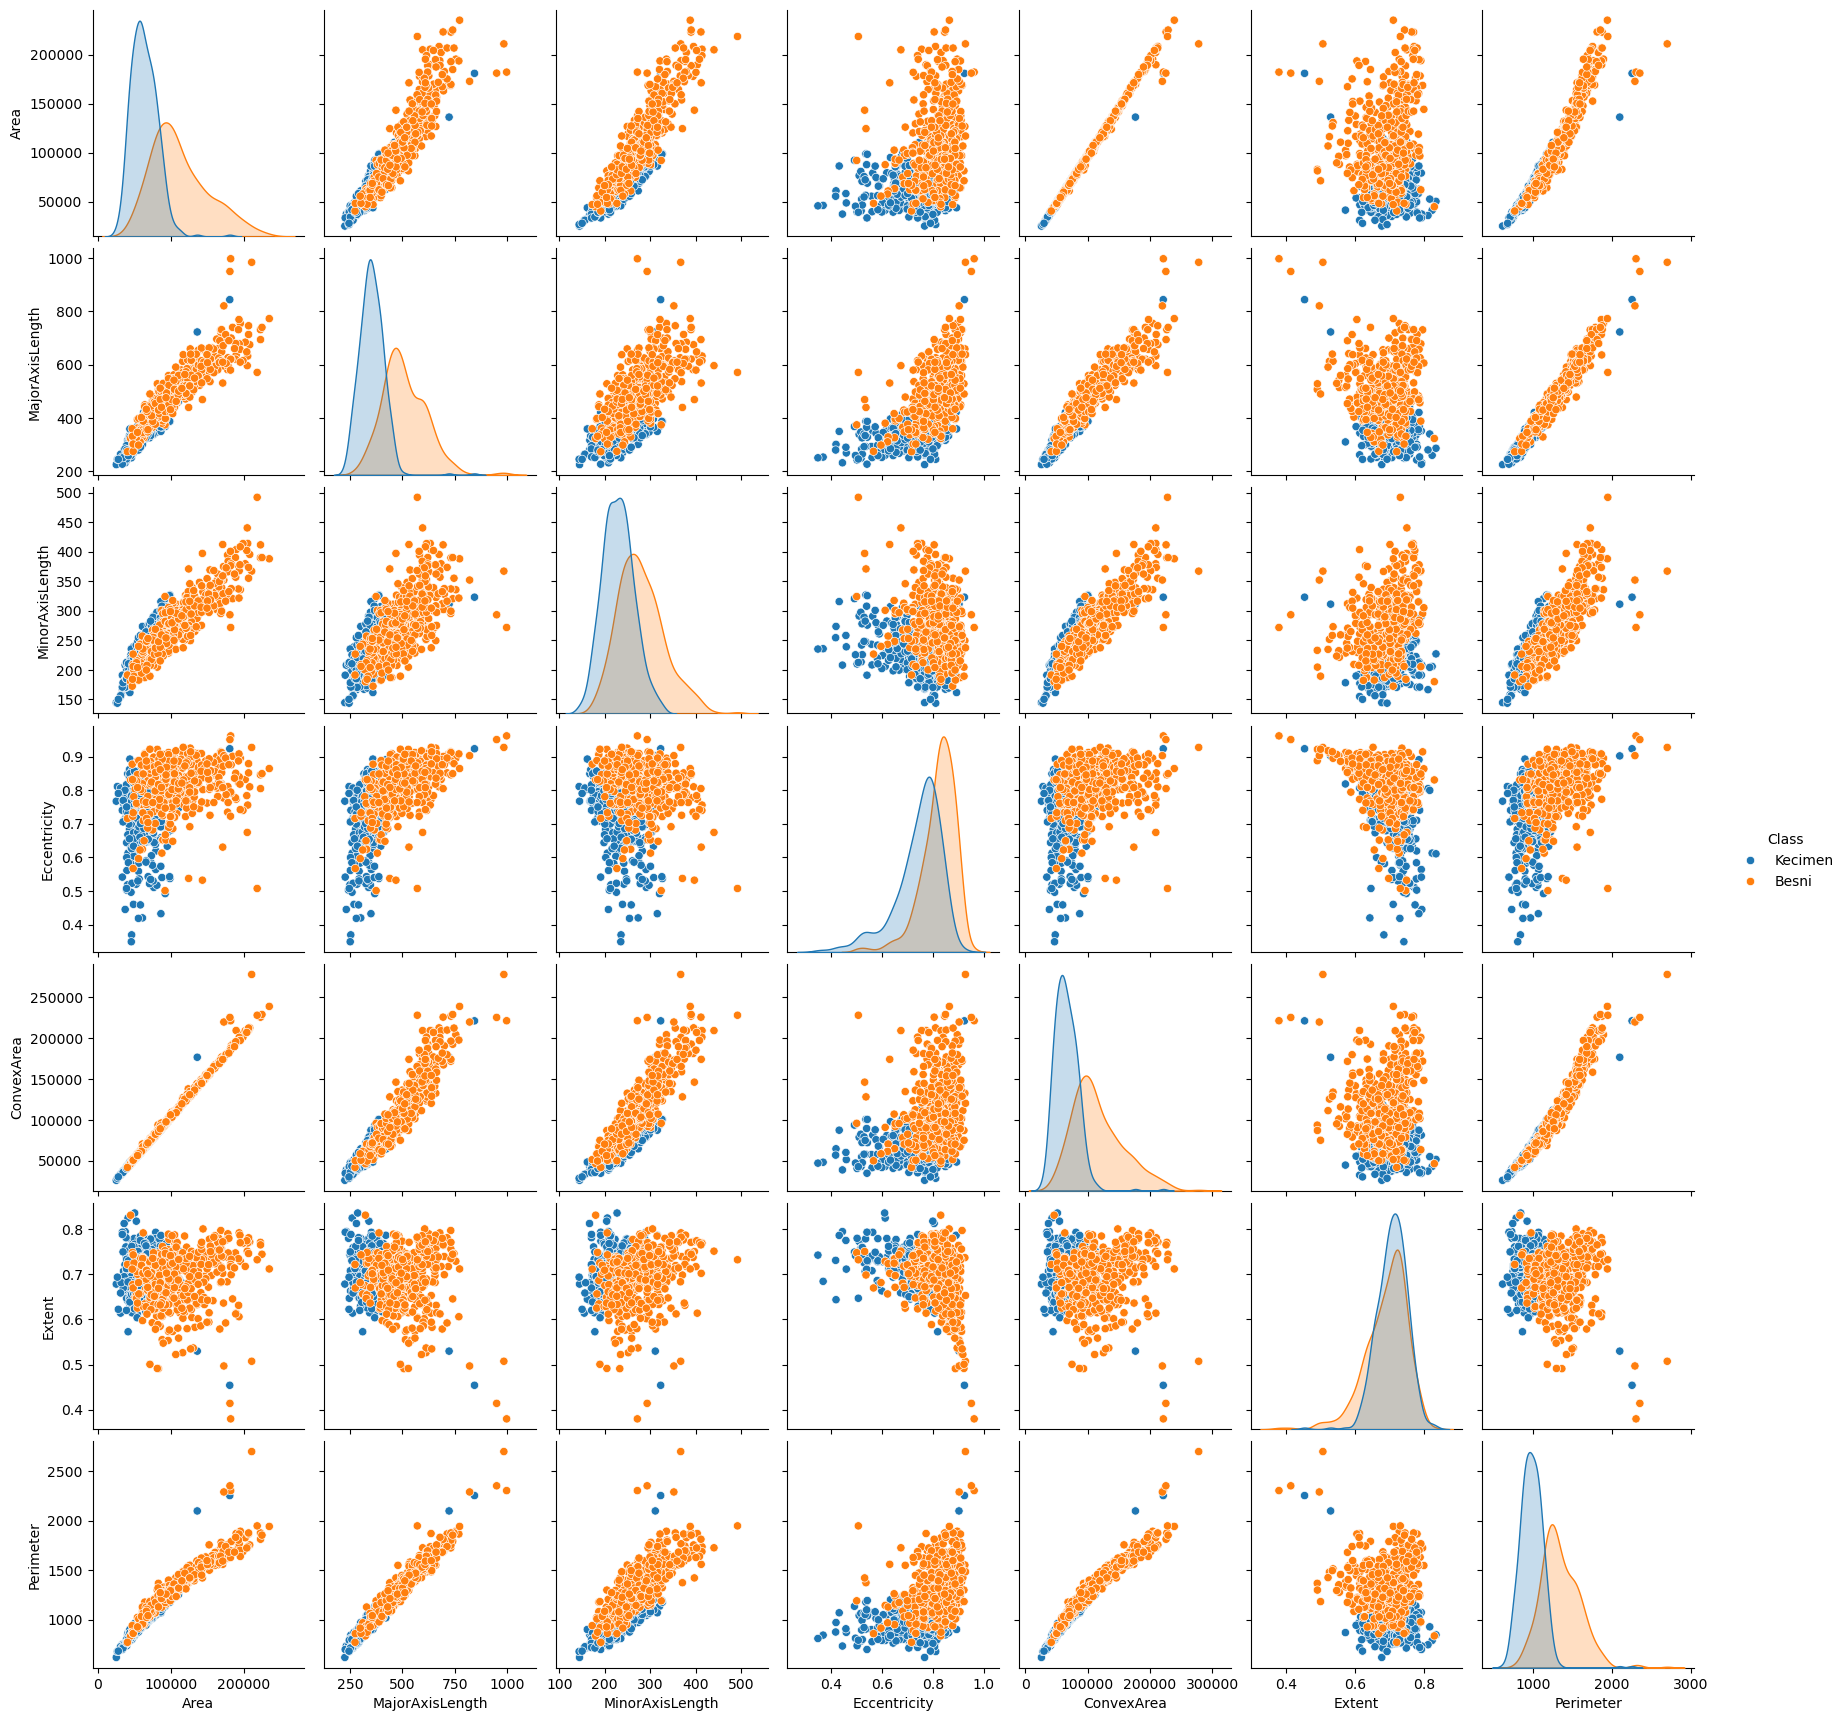

In [7]:
sns.pairplot(df, hue='Class')

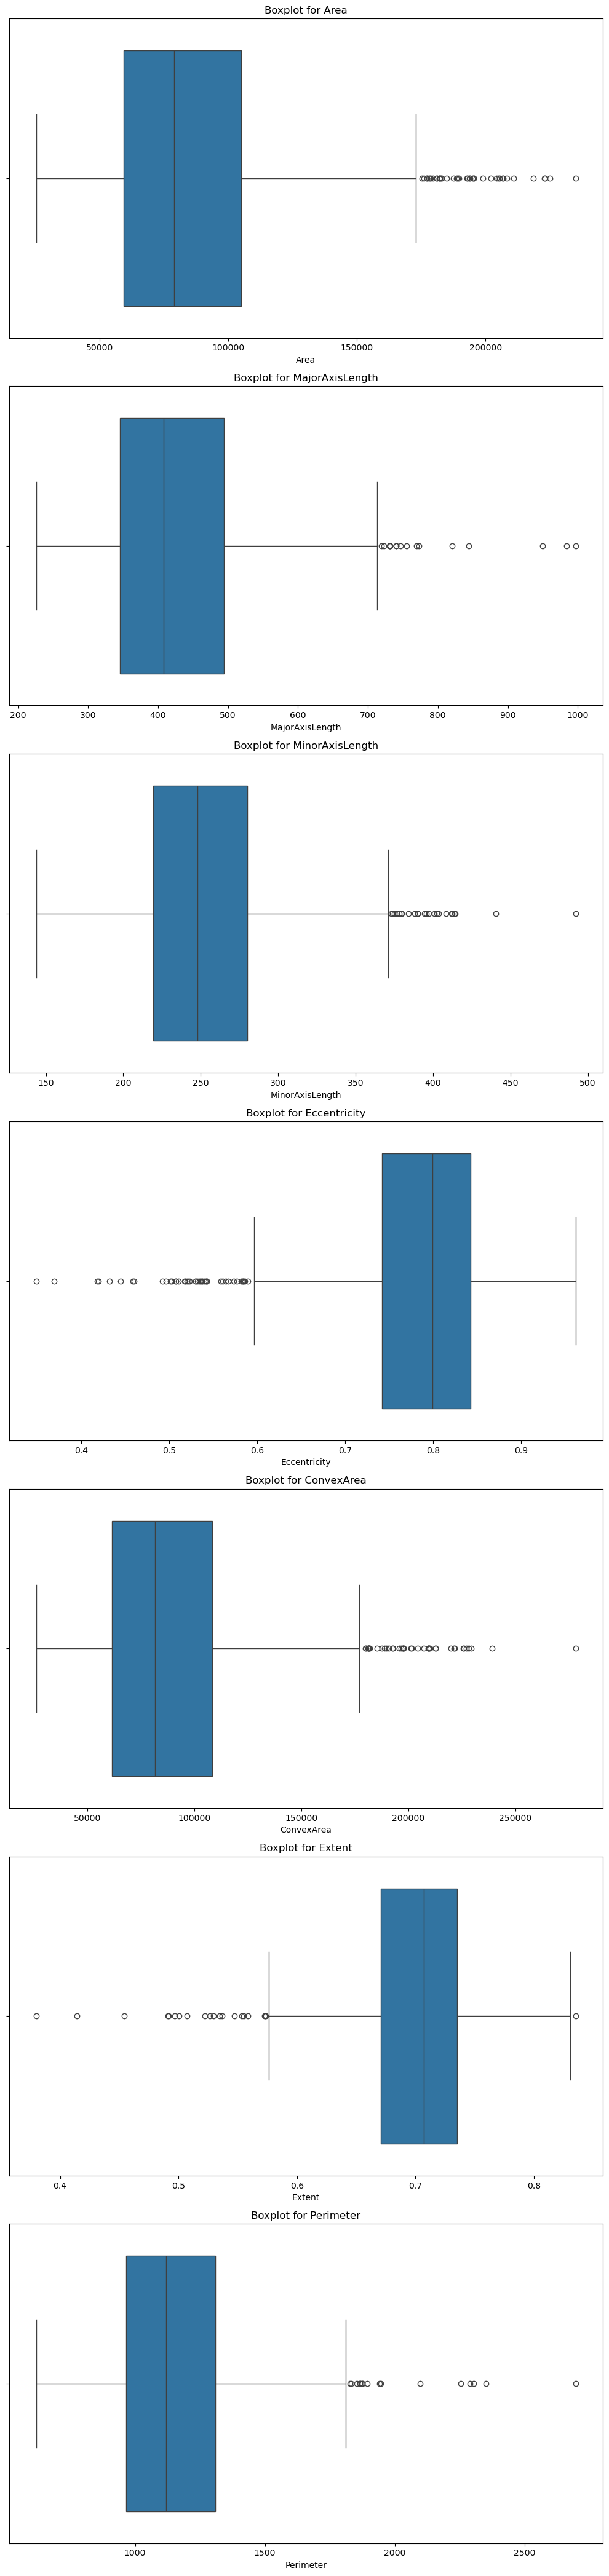

In [8]:
numerical_features = df.select_dtypes(include=['number']).columns
fig, axes = plt.subplots(nrows=len(numerical_features), figsize=(10, 6 * len(numerical_features)))

for i, feature in enumerate(numerical_features):
    sns.boxplot(data=df, x=feature, ax=axes[i])
    axes[i].set_title(f'Boxplot for {feature}')

plt.tight_layout()
plt.show();

<h2>Data Splitting</h2>

In [9]:
x = df.drop('Class', axis=1)
y = df['Class']

In [10]:
le = LabelEncoder()
y = le.fit_transform(y)

label_mapping = dict(zip(le.classes_, range(len(le.classes_))))
label_mapping

{'Besni': 0, 'Kecimen': 1}

In [11]:
df2 = x.copy()
df2["Class"] = y

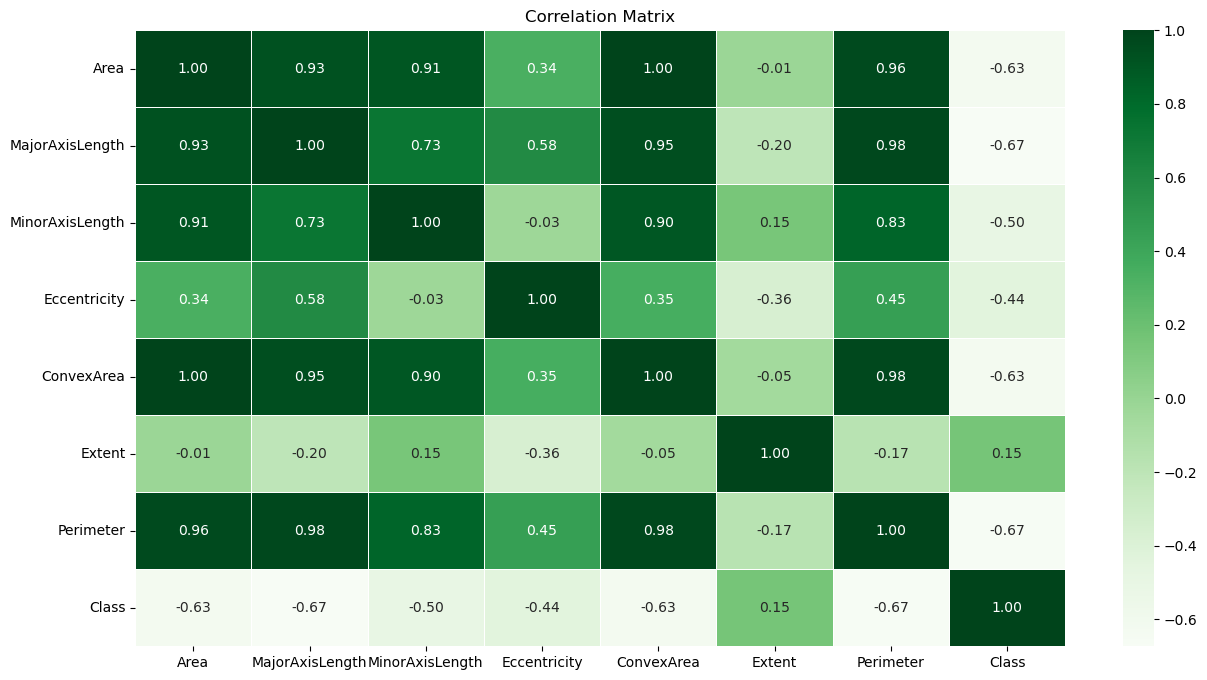

In [12]:
plt.figure(figsize=(15,8))
sns.heatmap(df2.corr(numeric_only=True), annot=True, cmap="Greens", fmt='.2f', linewidth=0.5)
plt.title('Correlation Matrix')
plt.show();

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [14]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

<h2>Machine Learning</h2>

In [15]:
abc = AdaBoostClassifier(random_state=42)
abc.fit(x_train, y_train)
acc_train = abc.score(x_train, y_train)

# Make predictions
y_pred = abc.predict(x_test)
acc_test = accuracy_score(y_test, y_pred)
print(f'Ada Boost Train Accuracy: {acc_train:.4f}')
print(f'Ada Boost Test Accuracy: {acc_test:.4f}')

Ada Boost Train Accuracy: 0.9042
Ada Boost Test Accuracy: 0.8667


In [16]:
cr_ML = classification_report(y_test, y_pred, target_names=le.classes_)
print(cr_ML)

              precision    recall  f1-score   support

       Besni       0.86      0.86      0.86        86
     Kecimen       0.87      0.87      0.87        94

    accuracy                           0.87       180
   macro avg       0.87      0.87      0.87       180
weighted avg       0.87      0.87      0.87       180



In [17]:
cm_ML = confusion_matrix(y_test, y_pred)
print(cm_ML)

[[74 12]
 [12 82]]


<h2>Deep Learning</h2>

In [18]:
DL_model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_normal', input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(80, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
DL_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = DL_model.fit(x_train, y_train, epochs=50, batch_size=16, validation_data=(x_test, y_test), callbacks=[EarlyStopping(patience=5)])

Epoch 1/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 10s 58ms/step - accuracy: 0.7341 - loss: 0.5832 - val_accuracy: 0.8556 - val_loss: 0.3245
Epoch 2/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.8476 - loss: 0.4033 - val_accuracy: 0.8611 - val_loss: 0.3170
Epoch 3/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.8643 - loss: 0.4055 - val_accuracy: 0.8611 - val_loss: 0.3197
Epoch 4/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.8552 - loss: 0.3897 - val_accuracy: 0.8667 - val_loss: 0.3174
Epoch 5/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.8705 - loss: 0.3313 - val_accuracy: 0.8667 - val_loss: 0.3208
Epoch 6/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.8858 - loss: 0.3357 - val_accuracy: 0.8667 - val_loss: 0.3198
Epoch 7/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.8844 - loss: 0.3528 - val_accuracy: 0.8667 - val_loss: 0.3286


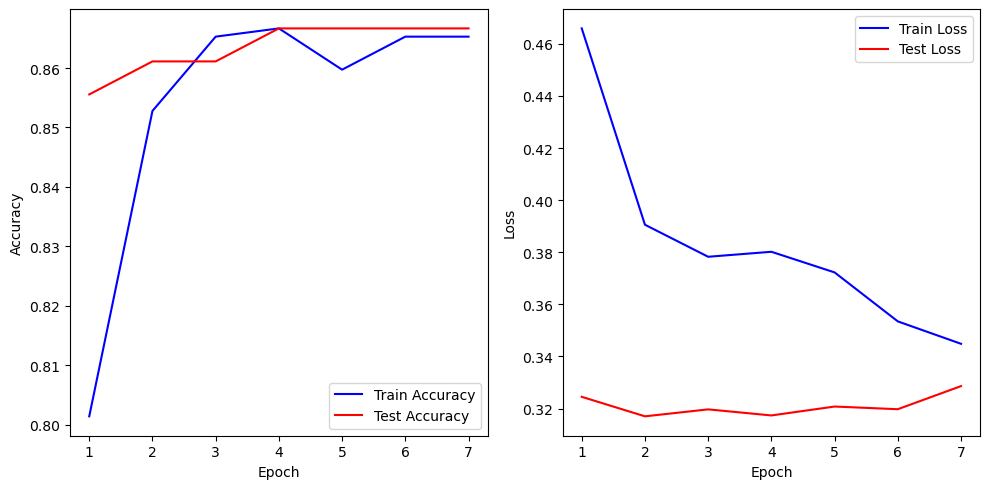

In [19]:
# learning curve
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
# creating subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].plot(epochs, acc, 'b', label='Train Accuracy')
axes[0].plot(epochs, val_acc, 'r', label='Test Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

axes[1].plot(epochs, loss, 'b', label='Train Loss')
axes[1].plot(epochs, val_loss, 'r', label='Test Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()

# adusting layout for better spacing
plt.tight_layout()

# display the figure
plt.show();

In [20]:
pred = DL_model.predict(x_test)
y_pred = (pred>0.5)
accuracy_score(y_test, y_pred)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step


0.8666666666666667

In [21]:
cr_DL = classification_report(y_test, y_pred, target_names=le.classes_)
print(cr_DL)

              precision    recall  f1-score   support

       Besni       0.84      0.88      0.86        86
     Kecimen       0.89      0.85      0.87        94

    accuracy                           0.87       180
   macro avg       0.87      0.87      0.87       180
weighted avg       0.87      0.87      0.87       180



In [22]:
cm_DL = confusion_matrix(y_test, y_pred)
print(cm_DL)

[[76 10]
 [14 80]]


<h2>ML vs DL</h2>

In [23]:
new_data = [[78000, 407, 248, 0.8, 82000, 0.7, 1200]]
new_data_scaled = sc.transform(new_data)

ML_prediction = abc.predict(new_data_scaled)
ML_prediction = 'Kecimen' if ML_prediction == 1 else 'Besni'

DL_prediction = DL_model.predict(new_data_scaled)
DL_prediction = 'Kecimen' if DL_prediction >= 0.5 else 'Besni'

print("ML prediction on Raisin Type:", ML_prediction)
print("DL prediction on Raisin Type:", DL_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step
ML prediction on Raisin Type: Kecimen
DL prediction on Raisin Type: Kecimen
